This notebook:
- **explores** response data for questions (or items) on a test
- **visualizes** differences between item responses at the state and national levels
- **models** if there is a statistically difference between the mean responses at the state and national levels using t test confidence interval and hypothesis testing

# 0. Load libaries

In [386]:
import pandas as pd 
import numpy as np

# 1. Load and prep data

In [265]:
df = pd.read_excel('Data/Quiz_Item_Responses.xlsx') 
df.head()

,Item_ID,score_outcome,number_of_responses
0,FL01M_CC_L01_01,INCORRECT,81
1,FL01M_CC_L01_01,CORRECT,799
2,FL01M_CC_L01_02,INCORRECT,70
3,FL01M_CC_L01_02,CORRECT,810
4,FL01M_CC_L01_03,INCORRECT,141


In [266]:
# group by Item_ID and sum number of responses
# add new variable percent_score_outcome_of_total_response, or number of responses / total responses
# filter where score_outcome is correct
groupby = (df.groupby(['Item_ID'])
           .agg({'number_of_responses': 'sum'})
           .rename(columns={'number_of_responses': 'total_responses'}))
df = df.join(groupby, on='Item_ID')
df["percent_score_outcome_of_total_response"]= join["number_of_responses"]/join["total_responses"]*100
df = df[df['score_outcome']=="CORRECT"]
df.head()

,Item_ID,score_outcome,number_of_responses,total_responses,percent_score_outcome_of_total_response
1,FL01M_CC_L01_01,CORRECT,799,880,90.795455
3,FL01M_CC_L01_02,CORRECT,810,880,92.045455
5,FL01M_CC_L01_03,CORRECT,739,880,83.977273
7,FL01M_CC_L01_04,CORRECT,776,879,88.282139
9,FL01M_CC_L01_05,CORRECT,782,879,88.964733


In [293]:
# split item id into parts
df[["Item_1","Item_2","Item_3","Item_4","Item_5"]]= df2["Item_ID"].str.split("_", expand = True)
df.head()

,Item_ID,score_outcome,number_of_responses,total_responses,percent_score_outcome_of_total_response,Item_1,Item_2,Item_3,Item_4,Item_5
1,FL01M_CC_L01_01,CORRECT,799,880,90.795455,FL01M,CC,L01,01,None
3,FL01M_CC_L01_02,CORRECT,810,880,92.045455,FL01M,CC,L01,02,None
5,FL01M_CC_L01_03,CORRECT,739,880,83.977273,FL01M,CC,L01,03,None
7,FL01M_CC_L01_04,CORRECT,776,879,88.282139,FL01M,CC,L01,04,None
9,FL01M_CC_L01_05,CORRECT,782,879,88.964733,FL01M,CC,L01,05,None


In [292]:
# item_1 represents a higher group than item_ids
# group by item_1 and average number_of_responses, total_responses, and percent

# For correct responses,
# What is the mean response behavior per item_id by item_1, or question on a test?

groupby2 = (df.groupby(['Item_1'])
            .agg({'number_of_responses': 'sum',
                  'total_responses': 'mean',
                  'percent_score_outcome_of_total_response': 'mean'})
            .rename(columns={'number_of_responses':'mean_correct_response_per_item',
                         'total_responses':'mean_total_responses_per_item',
                         'percent_score_outcome_of_total_response':'mean_percent_correct_per_item'
                        }))
groupby2

,mean_correct_response_per_item,mean_total_responses_per_item,mean_percent_correct_per_item
Item_1,,,
FL01M,40182,198.550523,71.143569
FL02M,19834,217.697297,51.289734
FL03M,38199,311.810127,51.648672
FL04M,57805,436.034188,56.676054
FL05M,41944,322.482609,55.052027
FL0KM,29590,151.015326,71.830159
G2,5896,316.725000,50.261343
G3,1645,356.888889,55.116006
G4,12919,420.568966,61.338602


In [231]:
# optional
(df.groupby(['Item_1'])
 .agg({'number_of_responses': ['mean', 'sum'],
      'percent': 'mean'}))

number_of_responses           percent
                      mean     sum      mean
Item_1                                      
FL01M           140.006969   40182  0.245420
FL02M           107.210811   19834  0.266091
FL03M           161.177215   38199  0.217884
FL04M           247.029915   57805  0.242096
FL05M           182.365217   41944  0.245802
FL0KM           113.371648   29590  0.287512
G2              147.400000    5896  1.162461
G3              182.777778    1645  5.690466
G4              222.741379   12919  0.913062
G5              231.423077   18051  0.707046
NA01M           886.618510  392772  0.144733
NA02M           791.377261  306263  0.113992
NA03M          1429.612048  593289  0.117399
NA04M          2313.730583  953257  0.119683
NA05M          2080.108312  825803  0.125930
NA0KM           618.173333  231815  0.199890

# 2. Visualize data

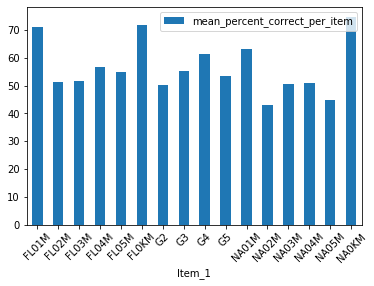

In [275]:
ax = groupby2.plot.bar(y='mean_percent_correct_per_item', rot=45) # x value is index when not specified
                                                                    # optional: join['Item_ID'] = join.index for x

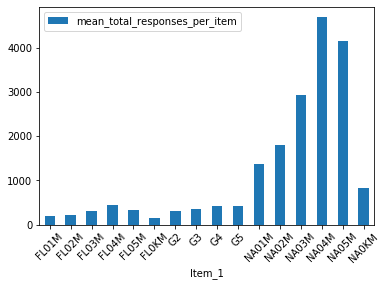

In [278]:
ax = groupby2.plot.bar(y='mean_total_responses_per_item', rot=45) # join.plot(kind='bar'...) also works

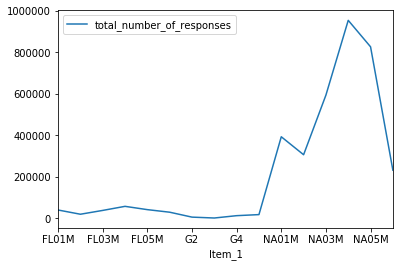

In [306]:
# population n size of responses
(df.groupby('Item_1')
 .agg({'number_of_responses': 'sum'})
 .rename(columns={'number_of_responses':'total_number_of_responses'})
 .plot())

# 3. Model data

## Is there a statistical difference in the mean of percent of total correct responses between the two populations (state tests (FL) and national test (NA))?

Use t test. Note: t test is used for small samples but still robust enough to use and acts more conservation on large samples.

First, understand (sample) population.

Then, run t test.

    Steps:
        1. set up h0 and ha
        2. set up rejection region, tcrit
        3. gather data, calculate tobs
        4. compare tobs to tcrit

Also, evaluate confidence interval and compare Sattertwaite's approximation for degrees of freedom.

## 3.1. Examine n size of sample populations

In [313]:
# nsize for all tests
df.Item_1.value_counts()

NA01M    443
NA03M    415
NA04M    412
NA05M    397
NA02M    387
NA0KM    375
FL01M    287
FL0KM    261
FL03M    237
FL04M    234
FL05M    230
FL02M    185
G5        78
G4        58
G2        40
G3         9
Name: Item_1, dtype: int64

In [343]:
# nsize for NA01M and NA01M
df.Item_1[(df.Item_1=='NA01M')|(df.Item_1=='FL01M')].value_counts()

NA01M    443
FL01M    287
Name: Item_1, dtype: int64

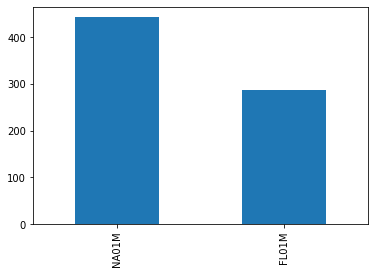

In [316]:
df.Item_1[(df.Item_1=='NA01M')|(df.Item_1=='FL01M')].value_counts().plot(kind='bar')

## 3.2 Run ttest

### 3.2.1. Hypothesis 
        H0: m1 = m2
        Ha: m1 != m2 
        alpha = 0.05
        two sided test, so alpha/2 = .025

### 3.2.2. Set up rejection region, tcrit

In [379]:
nasize=443
flsize=287
degreeoffreedom = nasize + flsize - 2
print('degree of freedom: ', degreeoffreedom)

# use ttable to find tcrit for degrees of freedom 3765 at alpha = 0.05 level, two-sided so alpha/2 = 0.025
ltcrit, utcrit = -1.9606, 1.9606
print('lower critical value: ', ltcrit)
print('upper critical value: ', utcrit)
# http://www.ttable.org/student-t-value-calculator.html

degree of freedom:  728
lower critical value:  -1.9606
upper critical value:  1.9606


### 3.3.3. Gather data, calculate tobs

In [377]:
# df has values for percent_score_outcome_of_total_response
df[(df.Item_1=='NA01M')|(df.Item_1=='FL01M')][['Item_1','percent_score_outcome_of_total_response']]

,Item_1,percent_score_outcome_of_total_response
1,FL01M,90.795455
3,FL01M,92.045455
5,FL01M,83.977273
7,FL01M,88.282139
9,FL01M,88.964733
...,...,...
4352,NA01M,54.166667
4354,NA01M,76.470588
4356,NA01M,76.470588
4357,NA01M,58.823529


In [353]:
# calculate std of percent_score_outcome_of_total_response from df
std_na = np.std(df[df.Item_1=='NA01M']['percent_score_outcome_of_total_response'])
std_fl = np.std(df[df.Item_1=='FL01M']['percent_score_outcome_of_total_response'])

print("na std of percent_score_outcome_of_total_response (correct responses): ", std_na)
print("fl std of percent_score_outcome_of_total_response (correct responses): ", std_fl)

na std of percent_score_outcome_of_total_response (correct responses):  19.519723867572708
fl std of percent_score_outcome_of_total_response (correct responses):  19.841252017942594


In [321]:
# groupby2 stores the mean calculations of percent_score_outcome_of_total_response
groupby2[(groupby2.index=='NA01M')|(groupby2.index=='FL01M')]

,mean_correct_response_per_item,mean_total_responses_per_item,mean_percent_correct_per_item
Item_1,,,
FL01M,40182,198.550523,71.143569
NA01M,392772,1382.801354,63.112870


In [354]:
# calculate mean_percent_correct_per_item difference between fl and na from groupby2
na=groupby2.loc['NA01M','mean_percent_correct_per_item']
fl=groupby2.loc['FL01M','mean_percent_correct_per_item']
nafl_mean_diff=na-fl
print('mean_percent_correct_per_item difference between na and fl: ', na-fl)

mean_percent_correct_per_item difference between na and fl:  -8.030698787720176


In [392]:
truemean_diff = 0 # given hypothesis, m1-m2 = 0
samplemean_diff = nafl_mean_diff

nasize=443
flsize=287
degreeoffreedom = nasize + flsize - 2 # assumes equal variances
df1 = degreeoffreedom

std_pooled = np.sqrt( ( ((nasize-1)*(std_na**2)) + ((flsize-1)*(std_fl**2) ) ) / (nasize+flsize-2) )
std_meandiff =  std_pooled * np.sqrt( (1/nasize) + (1/flsize) )

tobs = (samplemean_diff - truemean_diff) / std_meandiff
print("tobs using d1: ", tobs)

tobs using d1:  -5.39443364120004


### 3.3.4. Compare tobs to tcrit

tobs (-5.394) is not greater than tcrit (-1.906) and does not lie in the rejection region.

We fail to reject the null hypothesis and accept that the means of percent of total correct responses do not differ between these two indepedent populations (state testers (FL) and national tesert (NA)).

## 3.4. Confidence interval using t-test

In [398]:
print('mean_percent_correct_per_item difference between na and fl: ', na-fl)

mean_percent_correct_per_item difference between na and fl:  -8.030698787720176


In [399]:
# 95% CI, alpha = 0.05

lci, uci = samplemean_diff - (1.9606*std_meandiff), samplemean_diff + (1.9606*std_meandiff)
print("95% confidence interval: ", lci, uci)

95% confidence interval:  -10.9494459798168 -5.1119515956235535


In [400]:
# 99% CI, alpha = 0.01

lci, uci = samplemean_diff - (2.5771*std_meandiff), samplemean_diff + (2.5771*std_meandiff)
print("99% confidence interval: ", lci, uci)

99% confidence interval:  -11.86723014993185 -4.194167425508503


In [401]:
# 90% CI, alpha = 0.10

lci, uci = samplemean_diff - (1.6453*std_meandiff), samplemean_diff + (1.6453*std_meandiff)
print("90% confidence interval: ", lci, uci)

90% confidence interval:  -10.480058552667934 -5.5813390227724184


## 3.5. Compare using Sattertwaite's approximation for degrees of freedom

In [389]:
df2 = (((std_na**2/nasize) + ((std_fl**2/flsize))**2) / (((std_na/nasize)**2/(nasize-1)) + ((std_fl/flsize)**2/(flsize-1)))) 

# df2 used when unequal sample variances and/or unequal sample sizes
# df2 is Sattertwaite's approximation

# rule of thumb is ratio of two stds do not exceed 2 to 1, 
# you should be okay with standard t test, as long as sample sizes not too unequal
print("df1: ", df1)
print("df2: ", df2)

df1:  728
df2:  129911.54146006235


In [390]:
std_meandiff =  df2 * np.sqrt( (1/nasize) + (1/flsize) )
tobs = (samplemean_diff - truemean_diff) / std_meandiff
print("tobs using d2: ", tobs)

tobs using d2:  -0.0008158061639611791
